# Building a Neural Network From Scratch with NumPy

The goal of this Notebook is to give a hands-on explanation of how Artificial Neural Networks work. I intentionally avoided frameworks like PyTorch or Tensoflow because I wanted to build a better understanding of what Machine Learning models actually are, what Neural Networks actually are, and how they can be made. This Notebook is a collection of information I wish I had when I began this journey. It touches on a little bit of the math, but I don't deeply re-explain the math. I try to link out to more explanatory sources where I think it's valuable. Note: I am not a Machine Learning engineer, nor am I a Data Scientist. I'm a Software Engineer that turned into a political operative (lol). I wrote this for an audience of Software Engineers. Also: I don't have a GPU and I don't want to spend a bunch of money renting one from Amazon. This model can be trained and deployed on a modern CPU in a matter of minutes.

## What We'll Be Doing

We're going to build a Neural Network for multi-class classification. All that means is we're going to make a model takes in images and attempts to label them from a set of options. In our case, we're going to create a Neural Network that works with the [MNIST database of handwritten digits](https://webcache.googleusercontent.com/search?q=cache:yann.lecun.com/exdb/mnist/). This database contains 70,000 images of handwritten digits, 0 - 9, and corresponding labels of which digit the handwritten image is. We'll use 60,000 of the images to train our Neural Network, and 10,000 to test its accuracy. I've included the data with this Notebook in the `data/` directory.

Neural Networks are particularly handy for image classification tasks. There are many other types of Machine Learning out there, but we won't spend any attention on those.

## Background Concepts

### Shape of a Neural Network

First of all, let's demystify one thing: Neural Networks are just graphs. Just nodes and edges. If you've studied any Computer Science or have a background in Software Engineering, this is probably a familiar conecpet to you. The exact shape of any given Neural Network is dependant on how you build it, but that's something we get to decide. The graph has an **input layer** that is usually one node per input feature. In our case, **a pixel of an image is a feature**. Next, there are one or more **hidden layers**. Hidden layers are simply nodes in the graph that are in the middle. They take inputs from other nodes, and the give outputs to other nodes. This is the part that makes it Deep Learning. The presence of one or more hidden layers is the "deep" in Deep Learning. There's no standard rule for the size of a hidden layer, or how many you should have. Finally, there's an **output layer**. Each node in the output layer corresponds to one label. For example, if a possible label to an image is "cat" then one node in the output layer represents "cat". We're going to make a Neural Network that has a bunch of input layer nodes, a single hidden layer with ten nodes, and an output layer with ten nodes, one for each digit 0 - 9.

Each Nueron (node) has a unique **Weight** and **Bias**, and each layer has an **Activation Function**. The Activation Function defines the output of a neuron given its inputs, and does not change. We'll talk more about Activation Functions below. As we train our model, we adjust the Weights and Biases.

Here's are drawing of a Neural Network with three input nodes, a hidden layer with four nodes, and an output layer with two nodes. This might be how you'd construct a Neural Network that does binary classification: a model that tries to label inputs to one of two options for outputs.

| ![Artificial Neural Network](./img/artificial_neural_network.svg)|
|:--:|
|en:User:Cburnett, [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0/), via Wikimedia Commons|

If you're looking for more explanation of the structure of Neural Networks, "[But what is a Neural Network?](https://www.3blue1brown.com/lessons/neural-networks)" by 3Blue1Brown is excellent.

### How the Neural Network Learns

Neural Networks start out very stupid. As we'll see, they begin with no more "intelligence" than random guessing. Our goal is to **iteratively adjust the network's Weights and Biases** to make it smarter. This is called **training** and we do it in two steps: **Forward Propagation** and **Back Propagation**.

#### Forward Propagation

Think of this step as showing the Neural Network some input, and asking it to classify it. At the beginning, it's very likely to get it wrong. But, like humans, we need to get things wrong before we know how to get them right. In Forward Propagation, we simply push all our features (pixels) through the Neural Network and ask, "what did you see?" The output is all the answers to that question.

#### Back Propagation

Think of this step as showing the Neural Network how right or wrong its answers were. We take all its answers to, "what did you see?" and come up with a measure of how wrong it was. We assign a numeric value to the "how wrong was it?" question with a [cost function](https://www.simplilearn.com/tutorials/machine-learning-tutorial/cost-function-in-machine-learning). From that numerica value, we can work backwards on all the neurons (nodes) to tell them, "you were X wrong, and this specific neuron contributed to Y amount of that error; adjust this neuron's Weights and Biases by Z amount and try again."

3Blue1Brown has another excellent video on the conecepts of Back Propagation: "[What is backpropagation really doing?](https://www.3blue1brown.com/lessons/backpropagation)"

#### Training

And that's it! Our Neural Network learns by repeatedly making guesses, seeing how wrong it was, and adjusting its Weights and Biases. We repeat this over and over until it is good at the task! This is a lot like how people learn. Show a small child pictures of various farm animals over and over and ask them to name the animals. At first they're very bad at it, but over time they get very good at it. There's a lot of research out there that our artifical Neural Network is structured and operates like human brain neurons.

### Gradient Descent

Gradient Descent is the most math-y piece of all this. Again, 3Blue1Brown has a great video: "[Gradient descent, how neural networks learn](https://www.3blue1brown.com/lessons/gradient-descent)". This is the piece that is the most _choose-your-own-adventure_ for how much you want to actually understand. I recommend diving in at least a little bit.

Imagine being at a point graph and you want to find which step to take to get to the minimum value. If you've taken any calculus before, you know that you can take the slope at the current point to tell you which way the graph is trending, and by how much. If you do this over and over, with small steps, you will approach a local minimum. That's a 1-dimensional gradient descent. Our plan is to work with lots of repeated steps to get to a minumum of our [cost function](https://www.simplilearn.com/tutorials/machine-learning-tutorial/cost-function-in-machine-learning) — the function telling us how bad our predictions are.

| ![Gradient Descent](./img/GradientDescentGradientStep.svg)|
|:--:|
|Reducing Loss: Gradient Descent, [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/), via [Google Developers](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent)|

You can do this in two and three domensions as well. In fact, you can do it in as many dimensions as you need, which is very handy, because image classification has lots of dimensions. Imagine a color image. Its obvious dimensions are the pixel's X value, Y value, Red value, Green value, Blue value, alpha value, and probably many more.

Quick aside: **a "tensor" is just a matrix with a high-order of dimensions**.

| ![Gradient Descent](./img/GradientDescent.gif)|
|:--:|
|[CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/deed.en), via Wikimedia Commons|

Ultimately, we keep moving downward in our many-dimensional cost function to find a minimum value. The lower the cost, the better the prediction.

## Environment Setup

As stated, we're going to build and train a fully functioning Neural Network using only **NumPy**. That said, I'm also going to install **matplotlib** just so that we can visualize some of the work as we go. It's completely unnecessary to use matplotlib. Both of these libraries are set in `requirements.txt`.

It's also worth pointing out that I'm developing this in Python 3.10. Other versions of Python 3 probably work, too.

In [1]:
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Our Data

As mentioned, we're going to be working with the MNIST database of handwritten digits. This is a very handy beginner's data set because it's done a lot of the upfront work for us. First of all, the data is normalized: **all images are 28 x 28** and **grayscale**. The standard size is particularly helpful because we're going to need that to set up the input layer of our Neural Network. In other situations, you'd have to crop or squash or letterbox your images to make them a standard size. This is mostly boilerplate, but some details of the file format that you may wish to know:

* The images are encoded in the [IDX file format](https://www.fon.hum.uva.nl/praat/manual/IDX_file_format.html), which looks for the presence of some magic numbers
* There's a [documented structure](http://yann.lecun.com/exdb/mnist/) to this data set, but that website is often behind HTTP basic auth because people like to script against it; here's a [Google cache](https://webcache.googleusercontent.com/search?q=cache:yann.lecun.com/exdb/mnist/)
* The images are gzip'd
* The pixel values are 0 - 255, but we're going to divide them into floats 0 - 1

Here, we read in all the training data. We want to structure it into a matrix where each pixel is a row (this will line up with our input layer), and each image is a column. This gives us a matrix with 784 rows (28 x 28) and 60,000 columns.

This is the least intersting bit of code in the entire Notebook.

In [3]:
import gzip

DATA_DIR = './data/'
TEST_IMAGE_FILE_PATH = f'{DATA_DIR}/t10k-images-idx3-ubyte.gz'
TEST_LABEL_FILE_PATH = f'{DATA_DIR}/t10k-labels-idx1-ubyte.gz'
TRAINING_IMAGE_FILE_PATH = f'{DATA_DIR}/train-images-idx3-ubyte.gz'
TRAINING_LABEL_FILE_PATH = f'{DATA_DIR}/train-labels-idx1-ubyte.gz'

def load_images_and_labels(image_file_path, label_file_path):
    labels = None
    image_data = None

    with gzip.open(label_file_path, 'r') as label_file:
        # Verify magic number
        magic_number_bytes = label_file.read(4)
        magic_number = int.from_bytes(magic_number_bytes, byteorder='big', signed=False)
        assert magic_number == 2049

        # Read header telling us the number of labels
        number_of_labels_bytes = label_file.read(4)
        number_of_labels = int.from_bytes(
            number_of_labels_bytes, byteorder='big', signed=False
        )

        buffer = label_file.read(number_of_labels)
        labels = np.frombuffer(buffer, dtype=np.uint8)

        with gzip.open(image_file_path, 'r') as image_file:
            # Verify magic number
            magic_number_bytes = image_file.read(4)
            magic_number = int.from_bytes(
                magic_number_bytes, byteorder='big', signed=False
            )
            assert magic_number == 2051

            # Read header telling us the number of images
            # And check that it matches the number of labels
            number_of_images_bytes = image_file.read(4)
            number_of_images = int.from_bytes(
                number_of_images_bytes, byteorder='big', signed=False
            )
            assert number_of_images == number_of_labels

            # Read the image height header
            image_height_bytes = image_file.read(4)
            image_height = int.from_bytes(
                image_height_bytes, byteorder='big', signed=False
            )

            # Read the image width header
            image_width_bytes = image_file.read(4)
            image_width = int.from_bytes(
                image_width_bytes, byteorder='big', signed=False
            )

            # read in the image data
            buffer = image_file.read(image_width * image_height * number_of_images)
            image_data = np.frombuffer(buffer, dtype=np.uint8).astype(np.float64) / 255

            # Reshape it to a matrix such that each column is the pixels of the image
            # So, we end up with a matrix with `image_width*image_height` rows and `number_of_images` colums
            image_data = image_data.reshape(
                number_of_images, image_width * image_height
            ).T

    return image_data, labels

And show the first image and label:

Label: 5


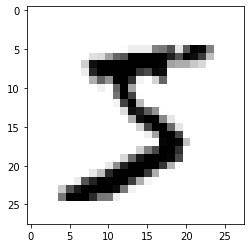

In [4]:
training_image_data, training_labels = load_images_and_labels(TRAINING_IMAGE_FILE_PATH, TRAINING_LABEL_FILE_PATH)
first_image_data = training_image_data[:, 0].reshape((28, 28))  # All the rows in the first column, reshaped back to 28 x 28
first_image_label = training_labels[0]

print(f'Label: {first_image_label}')
plt.imshow(first_image_data, cmap='gray_r', vmin=0, vmax=1)
plt.show()

## An Untrained Neural Network

### Initializing Weights and Biases

The first step in creating our Neural Network is to build out Forward Propagation. Since our Neural Network will have an input layer, one hidden layer, and an output layer, we'll need:
* A set of Weights and Biases on the input layer
* An Activation Function on the input layer
* A set of Weights and Biases on the hidden layer
* An Activation Function on the hidden layer

As mentioned, the Weights and Biases are variable and are determined in the model's training process. But our model needs to start somewhere. There are a variety of strategies for initializing Weights and Biases. You could initialize to random values, but we're going to use the [He method](https://towardsdatascience.com/coding-neural-network-parameters-initialization-f7c2d770e874) to initialize random Weights, and the [common recommendation of Biases initialized to zero](https://cs231n.github.io/neural-networks-2/).

In [5]:
# weights_1 is the matrix of Weights between our input nodes and the first hidden layer
# it has the shape num_labels x image_size
#
# biases_1 is the matrix of Biases between our input nodes and the first hidden layer
# it has the shape num_labels x 1
#
# weights_2 is the matrix of Weights between our hidden layer and our output layer
# it has the shape num_labels x num_labels
#
# biases_2 is the matrix of biases between our hidden layer and our output layer
# it has the shape num_labels x 1
def init_params(input_layer_size, hidden_layer_size, output_layer_size):
    weights_1 = np.random.randn(
        hidden_layer_size,
        input_layer_size,
    ) * np.sqrt(2 / input_layer_size)
    
    weights_2 = np.random.randn(
        hidden_layer_size,
        output_layer_size,
    ) * np.sqrt(2 / hidden_layer_size)

    biases_1 = np.zeros((hidden_layer_size, 1))
    biases_2 = np.zeros((output_layer_size, 1))

    return weights_1, biases_1, weights_2, biases_2

### Input Layer Activation Function

Next we need to select an activation function on our input layer. Common options are [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) and [ReLU](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29). ReLU is very effective and is a very common choice in computer vision models. Also, it's incredibly simple to implement, so we'll go with that.

All it does is take a value as input, and if the value is less than 0, return 0; if the value is greater than 0, return that value. That's it! [Here's a handy post comparing ReLU to other activation functions](https://www.aitude.com/comparison-of-sigmoid-tanh-and-relu-activation-functions/).

In [6]:
def relu(value):
    return np.maximum(value, 0)

### Hidden Layer Activation Function

The last piece we need for our Forward Propagation is an Activation Function on the hidden layer. Remember: this Activation Function is feeding to our output layer, so we need something that generates ten prediction values. A good way to do this is to take our unactivated hidden layer and normalize it such that it outputs "prediction odds" to our output layer. Put another way, if the model is 91% sure an input is the number 5, it should activate the 5's output node to 0.91, and the sum of all the other predictions should come to 0.09.

What we've just described is called the [Softmax function](https://en.wikipedia.org/wiki/Softmax_function). The mast might look a little strange ([here's a good explainer](https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60)), but all it's doing is taking in a set of numbers and normalizing them to be 0 - 1, with a sum of 1.

In [7]:
def softmax(inputs):
    exponentiated = np.exp(inputs)
    probabilities = exponentiated / np.sum(exponentiated, axis=0)
    return probabilities

### Forward Propagation

We can now combine our initialized Weights and Biases and our Activation Functions to define Forward Propagation. You'll notice some matrix math in here. Since our features (pixels) are arranged in a matrix, this is much more efficient that piping every pixel through functions one at a time. This becomes particularly true when you're working with Neural Networks of higher dimensions. [Here's a refresher on matrix dot product](https://www.youtube.com/watch?v=87_7YVCnAOw). But you can basically think of it as multiplying the neurons in a layer by their weights.

In [8]:
def forward_prop(weights_1, biases_1, weights_2, biases_2, input_layer):
    # First, calculate the unactivated values of the neurons in the first hidden layer
    # Dot product weights_1 on input_layer, and then add biases_1
    unactivated_hidden_layer = weights_1.dot(input_layer) + biases_1
    # Then apply the ReLU activation function, to get our first hidden layer
    activated_hidden_layer = relu(unactivated_hidden_layer)

    # Next calculate the unactivated values of the neurons in the output layer
    # Dot product weights_2 on activated_hidden_layer, and then add biases_2
    unactivated_output_layer = weights_2.dot(activated_hidden_layer) + biases_2
    # Then apply the softmax activation function, to get our activated output layer
    output_layer = softmax(unactivated_output_layer)

    return unactivated_hidden_layer, activated_hidden_layer, unactivated_output_layer, output_layer

This is actually all we need to do to have our model make a prediction. If we pass in a matrix of images, it'll give an `output_layer` of predicted labels. But remember, we haven't actually trained it yet, so it'll make **very bad predictions**. The two types of variables we have, the Weights and Biases, are set to random values. So this thing is going to perform with roughly 10% accuracy (randomly picking one of our ten digits). Let's see that.

We can define a measure of accuracy by dividing the number of correct predictions (the labels with the highest value in `output_layer`) by total number of predictions.

In [9]:
def get_predictions(output_layer):
    return np.argmax(output_layer, 0)  # return the index of the max value prediction


def get_accuracy(predictions, labels):
    return np.sum(predictions == labels) / labels.size

Here's what we get:

In [10]:
# Set up our Neural Network shape
image_size = training_image_data.shape[0]
num_labels = len(np.unique(training_labels))
hidden_layer_size = num_labels

# Initialize our Weights and Biases
weights_1, biases_1, weights_2, biases_2 = init_params(image_size, hidden_layer_size, num_labels)

( 
    unactivated_hidden_layer,
    activated_hidden_layer,
    unactivated_output_layer,
    output_layer,
) = forward_prop(
    weights_1,
    biases_1,
    weights_2,
    biases_2,
    training_image_data,
)

predictions = get_predictions(output_layer)
accuracy = get_accuracy(predictions, training_labels)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 7.08%


## Training the Neural Network

Now that we have a stupid Neural Network, let's train it so it can become a smart Neural Network. As mentioned before, Back Propagation is the proces in which we take the predictions from Forward Propagation, measure the error, and adjust our Weights and Biases through Gradient Descent.

Before we begin, we need one more helper function. We want to compare our known labels to all our predictions, and we can do that with a matrix with values of 1 (100%) at the correct index and 0 (0%) at all the incorrect indexes. We do this with [One-hot encoding](https://en.wikipedia.org/wiki/One-hot).

In [11]:
def one_hot(num_labels, labels):
    # Create a matrix of all zeroes with shape num_images x num_labels
    one_hot_y = np.zeros((labels.size, num_labels))
    # For every image row, set Y'th (actual label) column to 1
    # So, if the first row has label 5, set the 5th column to 1
    one_hot_y[np.arange(labels.size), labels] = 1
    # Return the Transposed matrix, so in the above example, the 5th row first column is 1
    return one_hot_y.T

In [12]:
one_hot_output = one_hot(num_labels, training_labels)

### Back Propagation

This is where we actually do our Gradient Descent. It contains a little bit of calculus, and I highly adivse you pause here and watch these three videos:
* [What is backpropagation really doing?](https://www.3blue1brown.com/lessons/backpropagation)
* [Backpropagation Calculus](https://www.3blue1brown.com/lessons/backpropagation-calculus)
* [Backpropagation for Softmax and Multi-Class Classification | Complete Mathematical Derivation](https://www.youtube.com/watch?v=f-nW8cSa_Ec)

It's actually not all that imporant to master the calculus in these videos, but it's very helpful to see what math is happening. From a high-level: we take the derivatives of our activation functions, and we reverse our matrix multiplication. It's actually not too daunting. In the end, it gives is a measurement of error, and we use that error to adjust our Weights and Biases.

Speaking of derivatives, we're gonna need the derivated of our ReLU Activation Function:

In [13]:
# rectified_linear_unit only ever has a slope of 0 (negative X), or 1 (positive X)
def derivative_rectified_linear_unit(Z):
    return Z > 0

And now we just go backwards through the Neural Network:

In [14]:
def back_prop(unactivated_hidden_layer, activated_hidden_layer, weights_2, output_layer, one_hot_output, training_image_data):
    num_images = one_hot_output.size

    # The difference between the predictions and the actual labels
    d_predictions = output_layer - one_hot_output

    # Take that d_predictions and cary back to the activated hidden layer
    # And then average over all the neurons
    d_weights_2 = (1 / num_images) * d_predictions.dot(activated_hidden_layer.T)

    # Derivative of biases_ 2 is acutally just an average of the abosolute error
    d_biases_2 = (1 / num_images) * np.sum(d_predictions)

    # Derivative of unactived hidden layer
    # Transpose the 2nd layer weights and dot on the known d_predictions
    # And multiply that by the derivative of the activation function
    d_hidden_layer = weights_2.T.dot(d_predictions) * derivative_rectified_linear_unit(unactivated_hidden_layer)

    # Again, take our current derivative and cary it back to the input layer
    # And average it over all the neurons
    d_weights_1 = (1 / num_images) * d_hidden_layer.dot(training_image_data.T)
    
    # Derivative of biases_1 is like biases_2, but it's a simple average of the abolute error from the hiddle layer
    d_biases_1 = (1 / num_images) * np.sum(d_hidden_layer)

    return d_weights_1, d_biases_1, d_weights_2, d_biases_2

## Training Our Model

### Learning Rate

We're almost ready to train our model. The last piece here is to actually update our Weights and Biases after Back Propagation. You may be tempted to simply subracts the differences returned by `back_prop` but it's not quite so simple. Remember, our Gradient Descent is good at telling us the slope at our current location, but it's very unlikely to be a straight line. Instead, we're going to want to take smaller steps so that we don't over-shoot.

We need to introduce a variable called `learning_rate`, sometimes called **alpha**. This is a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)), which simply means that our model can't learn the correct value through training; we have to set it ourselves. There are techniques to make this process more efficient, but usually it's a bit of guess and check. If your model has a very bad time improving, you should try adjusting your learning rate. Common learning rates are between 0.01 and 1. If you'd like to read more about picking a learning rate, [this is a good post](https://www.jeremyjordan.me/nn-learning-rate/).

Through some trial and error, I found that a learning rate of 0.5 worked pretty well for this model.

In [15]:
learning_rate = 0.5

We can use this to update our Weights and Biases:

In [16]:
def update_params(weights_1, biases_1, weights_2, biases_2, d_weights_1, d_biases_1, d_weights_2, d_biases_2, learning_rate):
    weights_1 = weights_1 - learning_rate * d_weights_1
    biases_1 = biases_1 - learning_rate * d_biases_1
    weights_2 = weights_2 - learning_rate * d_weights_2
    biases_2 = biases_2 - learning_rate * d_biases_2

    return weights_1, biases_1, weights_2, biases_2

### Training

Now let's train our model! You might recall that it'll take many iterations of Forward Propagation and Back Propagation for our model to get smart. But how many iterations? I don't actually know! Let's decide right now that we want our model to be at least 90% accurate on the training data. We've already got a function to tell us accuracy, so let's let it train until that reaches 90%.

This is the slow part, and the part that often benefits from GPUs. But, as you'll see, this Neural Network trains surpisingly quickly! On my laptop with no GPU and a 2.6 GHz 6-Core Intel Core i7, the model rechease 90% accuracy on the training data in under two minutes!

Iteration: 1 | Accuracy: 7.20%
Iteration: 100 | Accuracy: 78.34%
Iteration: 200 | Accuracy: 85.15%
Iteration: 300 | Accuracy: 87.29%
Iteration: 400 | Accuracy: 88.50%
Iteration: 500 | Accuracy: 89.18%
Iteration: 600 | Accuracy: 89.66%
Achieved 90.00% accuracy after 687 iterations!


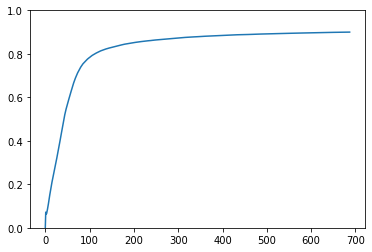

In [17]:
image_size = training_image_data.shape[0]
num_labels = len(np.unique(training_labels))
hidden_layer_size = num_labels

weights_1, biases_1, weights_2, biases_2 = init_params(image_size, hidden_layer_size, num_labels)

accuracy = 0
iteration = 0
accuracy_measurements = [0]  # A running list of our accuracy for each iteration

while accuracy < 0.9:
    iteration += 1

    ( 
        unactivated_hidden_layer,
        activated_hidden_layer,
        unactivated_output_layer,
        output_layer,
    ) = forward_prop(
        weights_1,
        biases_1,
        weights_2,
        biases_2,
        training_image_data,
    )

    one_hot_output = one_hot(num_labels, training_labels)

    (
        d_weights_1,
        d_biases_1,
        d_weights_2,
        d_biases_2,
    ) = back_prop(
        unactivated_hidden_layer,
        activated_hidden_layer,
        weights_2, output_layer,
        one_hot_output,
        training_image_data,
    )

    (
        weights_1,
        biases_1,
        weights_2,
        biases_2,
    ) = update_params(
        weights_1,
        biases_1,
        weights_2,
        biases_2,
        d_weights_1,
        d_biases_1,
        d_weights_2,
        d_biases_2,
        learning_rate,
    )

    predictions = get_predictions(output_layer)
    accuracy = get_accuracy(predictions, training_labels)

    accuracy_measurements.append(accuracy)

    # Print out upadtes as we go
    if iteration == 1 or iteration % 100 == 0:  
        print(f'Iteration: {iteration} | Accuracy: {accuracy*100:.2f}%')

print(f'Achieved {accuracy*100:.2f}% accuracy after {iteration} iterations!')

# Plot the accuracy curve
plt.plot(accuracy_measurements)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Now we have the Weights and Biases for our Neural Network to achieve 90% accuracy against our training data. That's pretty cool, but the real test to to run images through the model that it's never seen before. If we overfit the model, it might only be good at recognizing the images it was trained on (kindof like cramming for a test and memorizing the answers without actually learning anything). Let's run it against our 10,000 test images. At this point we only need to run it through `forward_prop` because we're no longer training. This is very fast!

In [18]:
test_image_data, test_labels = load_images_and_labels(TEST_IMAGE_FILE_PATH, TEST_LABEL_FILE_PATH)
_, _, _, test_output_layer = forward_prop(
        weights_1,
        biases_1,
        weights_2,
        biases_2,
        test_image_data,
    )
test_predictions = get_predictions(test_output_layer)
test_accuracy = get_accuracy(test_predictions, test_labels)
print(f'Test Data Set Accuracy: {test_accuracy*100:.2f}%')

Test Data Set Accuracy: 90.44%


That's great! And let's look at a sample of 10 test images and how they were labeled:

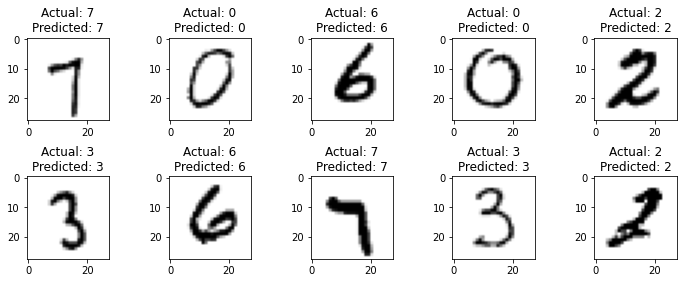

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for ax in axes.flat:
    random_index = np.random.randint(0, len(test_labels))
    random_test_image_data = test_image_data[:, random_index].reshape((28, 28))
    random_test_image_label = test_labels[random_index]
    random_prediction = test_predictions[random_index]

    ax.imshow(random_test_image_data, cmap='gray_r', vmin=0, vmax=1)
    ax.set(title=f'Actual: {random_test_image_label}\nPredicted: {random_prediction}')

plt.tight_layout()
plt.show()

Very impressive!

We've successfully built a computer vision Machine Learning model using nothing but NumPy. Hopefully this demystified some of the some of the concepts of Neural Networks!  

## Acknowledgements

My first pass at tackling this topic began with Samson Zhang's "[Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math)](https://www.youtube.com/watch?v=w8yWXqWQYmU)". This Notebook looks a lot like his work, though I hit a number of implementation errors while following along. By digging into the articles and videos linked in this Notebook, and made adjustments to the model's training to get to this final output.